In [1]:
import numpy as np

### SHA-1

In [8]:
for i in [2, 3, 5, 10]:
    a = int(2**30*np.sqrt(i))
    print('0x%x'%a)

0x5a827999
0x6ed9eba1
0x8f1bbcdc
0xca62c1d6


### Birthday paradox

In [15]:
prod = 1
for i in range(39):
    prod = prod * (1 - (i+1)/1000)

In [14]:
1-prod

0.5463719707129396

In [16]:
40 * 0.001 * 0.999**39

0.038469277707139614

### Faster modular exponentiation

[gmpy documentation](https://gmpy2.readthedocs.io/en/latest/intro.html)

In [1]:
from gmpy2 import *
import time

In [2]:
def fme(a1, b1, a, b, n):
    prod = mpz(1)
    ab = (a1 * b1)%n
    while a and b:
        if a%2 and b%2:
            prod = (prod*ab) % n
        elif a%2:
            prod = (prod*a1) % n
        elif b%2:
            prod = (prod*b1) % n
        a1 = (a1*a1) % n
        b1 = (b1*b1) % n
        ab = (ab*ab) % n
        a >>= 1
        b >>= 1
    return prod

In [3]:
def mod_exp(b, e, n):
    prod = mpz(1)
    while e:
        if e%2:
            prod = (prod*b) % n
        b = (b*b) % n
        e >>= 1
    return prod

In [4]:
p = mpz(6847944682037444681162770672798288913849)
is_prime(p)

True

In [5]:
# compare speed using p from above
a1 = 77777    # alpha
b1 = 111111   # beta
a = [2**16-1, 2**32-3, 2**64-1, 2**128-3, 2**256-1, 2**512-3]
b = [2**16-3, 2**32-1, 2**64-3, 2**128-1, 2**256-3, 2**512-1]

In [8]:
for i in range(6):
    start=time.clock()
    for k in range(100):
        x = fme(a1, b1, a[i], b[i], p)
    end=time.clock()
    # print(x)
    print(end-start)


0.0014979999999999993
0.0029399999999999427
0.006952999999999987
0.012719999999999954
0.026886999999999994
0.047355999999999954


In [9]:
for i in range(6):
    start=time.clock()
    for k in range(100):
        x1 = mod_exp(a1, a[i], p)
        x2 = mod_exp(b1, b[i], p)
        x = (x1*x2) % p
    end=time.clock()
    # print(x)
    print(end-start)


0.0014569999999999306
0.0028890000000000304
0.005965999999999916
0.013038000000000105
0.026564000000000032
0.04476899999999995


In [72]:
import matplotlib.pyplot as plt

In [93]:
ftime = [0.0008799999999999919, 0.0019059999999999633, 0.00417500000000004, 
         0.008385000000000087, 0.021055000000000046, 0.03847599999999973]
mtime = [0.0013600000000000279, 0.0027960000000000207, 0.0066230000000002676, 
         0.01299399999999995, 0.023573000000000288, 0.04470099999999988]
l = [16, 32, 64, 128, 256, 512]

f = [i/100 for i in ftime]
m = [i/100 for i in mtime]

Text(0,0.5,'average time')

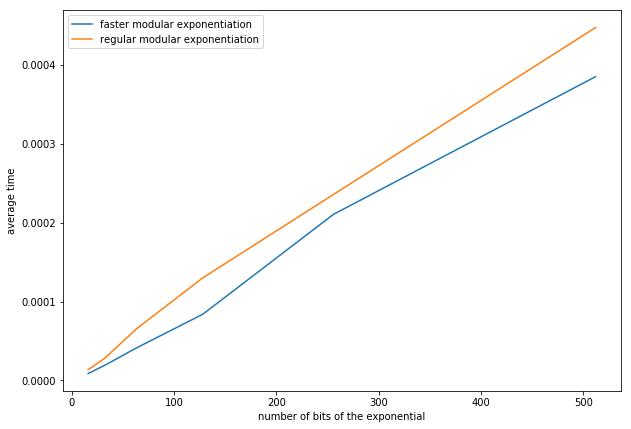

In [96]:
plt.figure(figsize=(10,7))
plt.plot(l, f)
plt.plot(l, m)
label = ["faster modular exponentiation", "regular modular exponentiation"]
plt.legend(label)
plt.xlabel("number of bits of the exponential")
plt.ylabel('average time')